# K-Nearest Neighbors

In this notebook we will learn how to use the K-nearest neighbors algorithm to predict a continous variable. 

In [1]:
import pandas as pd
import numpy as np

cars_colnames = ['symboling','normalized_losses', 'make', 'fuel_type', 
                 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 
                 'engine_location', 'wheel_base', 'length', 'width', 'height',
                 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 
                 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
                 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('imports-85.data', names = cars_colnames, header = 0)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


First, we will define which variables are numeric. We would expect symboling, normalized losses, number of doors, wheel base, length, width, height, curb weight, engine size, bore, stroke, compression ratio, horsepower, peak of rpm, city miles per gallon, highway miles per gallon, price. However, we will see that not all these variables are set as numeric.

We may want to predict the price of the car, so we need to define this variable as numeric and the target variable, while the rest are features.

In [2]:
cars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


We will clean a bit, to remove special characters, and then assign the rest of features that we identify as numeric to int or float types.

In [3]:
cars = cars.replace('?', np.nan)
cars = cars.replace('', np.nan)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
numeric_cars = numeric_cars.astype('float')

Now we need to select which variables we want to use. Let's see how much NA's are there per column. According to the amount of NA's we can either eliminate the entire variable (if it has too many), drop the row that has NA's, or replace the missing values by the mean of each column.

In [6]:
for i in numeric_cars:
    nans = numeric_cars[i].isnull().sum()
    print(i, nans)
        

normalized_losses 40
wheel_base 0
length 0
width 0
height 0
curb_weight 0
engine_size 0
bore 4
stroke 4
compression_ratio 0
horsepower 2
peak_rpm 2
city_mpg 0
highway_mpg 0
price 4


We will eliminate the normalized losses variable, and for the rest of the variables with NA's we will use mean imputation.

In [7]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [8]:
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Now we normalize the data

In [9]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

## Let's start to train!


### Univariate Function

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_column, target_column, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)

    new_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(new_index)
    half = int(len(df_shuffled) / 2)
    
    train = df_shuffled.iloc[:half]
    test = df_shuffled.iloc[half:]
    
    knn.fit(train[[train_column]], train[target_column])
    predictions = knn.predict(test[[train_column]])
    
    mse = mean_squared_error(test[target_column], predictions)
    rmse = np.sqrt(mse)
    return rmse


In [11]:
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.500000,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,0.258333,0.551020,0.166667,0.236842,15250.0


In [12]:
training_cols = numeric_cars.columns.drop('price')
rmse_results = {}

for col in training_cols:
    rmse_values = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_values

In [13]:
rmse_results

{'normalized_losses': 7940.136933540406,
 'wheel_base': 5727.869929440714,
 'length': 5179.845781877185,
 'width': 4895.606047592862,
 'height': 8147.40894690192,
 'curb_weight': 4226.174644907722,
 'engine_size': 3645.965866190649,
 'bore': 7667.965024707109,
 'stroke': 7162.946044764422,
 'compression_ratio': 6242.230467455945,
 'horsepower': 5105.756402346289,
 'peak_rpm': 7600.208262490945,
 'city_mpg': 5608.7414562088325,
 'highway_mpg': 4497.8387026253085}

Now, instead of only allowing to find the RMSE of each independent variable only with the default value of K in the KNearestNeighbors function, we will modify the function so it tests different values of K: 1, 3, 5, 7 and 9.

In [14]:
def knn_train_test(train_column, target_column, df):

    new_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(new_index)
    half = int(len(df_shuffled) / 2)
    
    train = df_shuffled.iloc[:half]
    test = df_shuffled.iloc[half:]
    
    k_values = [1, 2, 5, 7, 9]
    k_rmse = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        np.random.seed(1)
        knn.fit(train[[train_column]], train[target_column])
        predictions = knn.predict(test[[train_column]])
        mse = mean_squared_error(test[target_column], predictions)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

In [15]:
k_rmse_results = {}

for col in training_cols:
    rmse_values = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_values

In [16]:
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine_size          3832.982069
curb_weight          4640.126264
highway_mpg          4831.370135
width                4885.957131
length               5096.888451
horsepower           5115.288234
wheel_base           5417.286425
city_mpg             5821.141380
compression_ratio    6898.478969
normalized_losses    7806.725498
peak_rpm             7819.404181
stroke               8118.715886
height               8231.591699
bore                 8572.083328
dtype: float64


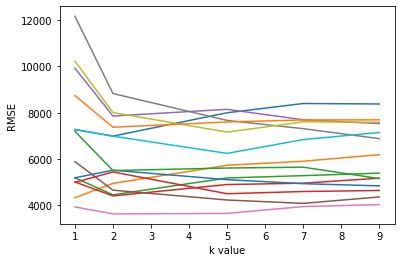

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

### Multivariate Function

In [18]:
def knn_train_test(list_column_names, target_column, df):

    new_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(new_index)
    half = int(len(df_shuffled) / 2)
    
    train = df_shuffled.iloc[:half]
    test = df_shuffled.iloc[half:]

    knn = KNeighborsRegressor()
    np.random.seed(1)
    knn.fit(train[list_column_names], train[target_column])
    predictions = knn.predict(test[list_column_names])
    mse = mean_squared_error(test[target_column], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [19]:
k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': 3774.071698155335,
 '3 best features': 3652.3629760101567,
 '4 best features': 4155.277001806913,
 '5 best features': 4040.355731991871,
 '6 best features': 4100.864859779804}

In [20]:
def knn_train_test(list_column_names, target_column, df):

    new_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(new_index)
    half = int(len(df_shuffled) / 2)
    
    train = df_shuffled.iloc[:half]
    test = df_shuffled.iloc[half:]
    
    k_rmse = {}
    
    for k in range(1, 26):
        knn = KNeighborsRegressor(n_neighbors = k)
        np.random.seed(1)
        knn.fit(train[list_column_names], train[target_column])
        predictions = knn.predict(test[list_column_names])
        mse = mean_squared_error(test[target_column], predictions)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

In [21]:
k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 3932.1859942549395,
  2: 3698.902415565425,
  3: 3700.5121707121984,
  4: 3718.615441827325,
  5: 3774.071698155335,
  6: 3862.1497419541274,
  7: 3953.519971736691,
  8: 4158.086647695807,
  9: 4217.71395868254,
  10: 4279.160129427468,
  11: 4287.791603183001,
  12: 4308.175906657305,
  13: 4362.787570365968,
  14: 4396.744829734996,
  15: 4336.825437814975,
  16: 4421.689823592336,
  17: 4477.285320917959,
  18: 4579.473636269241,
  19: 4603.955145337728,
  20: 4647.120552159317,
  21: 4684.731259443996,
  22: 4761.839848452126,
  23: 4821.849879761364,
  24: 4847.032168369308,
  25: 4847.902766587988},
 '3 best features': {1: 3697.1640658863616,
  2: 2970.578015657945,
  3: 3360.539784692221,
  4: 3505.0509259810724,
  5: 3652.3629760101567,
  6: 3801.634123534037,
  7: 3926.8215638068828,
  8: 4066.415432273692,
  9: 4139.360954253274,
  10: 4256.706291228831,
  11: 4229.835276568019,
  12: 4310.4335232540725,
  13: 4339.251192750035,
  14: 4263.94167055749

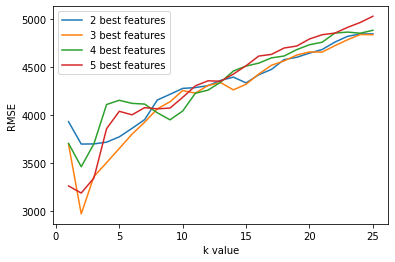

In [24]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()